# 文書生成（テキスト翻訳）におけるモデル評価ベストプラクティスのシナリオ
## 1.はじめに
- 本チュートリアルでは、「T5 言語モデルを用いた翻訳タスクの評価」を題材に、翻訳精度を測定する手法について紹介します。具体的には、HuggingFaceの事前学習済みモデル（T5-small）を用い、翻訳結果を METEOR スコアで評価します。
- 本チュートリアルでは、制約の少ないデータセットを用い、手元で実行できる形で解説を進めます。

### 1.1.目次
- 1.はじめに
  - 1.1.目次
  - 1.2.シナリオの概要
  - 1.3.シナリオの流れ
  - 1.4.シナリオの到達目標
- 第一部：Qunomonを用いた翻訳タスクの評価
  - 2.チュートリアル用の資材準備
  - 3.Qunomonを用いた評価
    - 3.1.Qunomonのダウンロード・インストールとQunomonの起動
    - 3.2.AITのインストール
    - 3.3.機械学習コンポーネント（Inventory）の登録
    - 3.4.テスト仕様（Test Description）の登録
    - 3.5.評価の実行と結果確認
    - 3.6.品質レポートの作成
- 第二部 機械学習コンポーネントの準備方法
  - 4.データセットの準備
    - 4.1.データセットの作成
    - 4.2.データセットの配置
  - 5.モデルの準備
    - 5.1.モデルのダウンロード
    - 5.2.モデルのファインチューニング
    - 5.3.モデルの検証

### 1.2.シナリオの概要
本シナリオでは、HuggingFaceの事前学習済みT5-smallモデルを用いて英語からフランス語への翻訳を実行し、翻訳品質をMETEORスコアで評価します。ファインチューニングでモデル品質向上、LLMモデルを使うベストプラクティスを見つける。

翻訳品質の評価指標は以下の通りです。

METEORスコア範囲
- 0.0 - 0.2: 翻訳の品質が非常に低い。
- 0.2 - 0.4: 翻訳の品質が低い。
- 0.4 - 0.6: 翻訳の品質が普通。
- 0.6 - 0.8: 翻訳の品質が良い。
- 0.8 - 1.0: 翻訳の品質が非常に高い。

### 1.3.シナリオの流れ
本シナリオでは、以下の流れで進めます。
- 翻訳モデルの準備：T5-smallの事前学習済みモデルをロードし、翻訳タスクを実行できるように設定します。
- データセットの準備：JSON形式の翻訳データセットを取得し、適切なフォーマットに整形します。
- 翻訳タスクの実行：T5モデルを用いて翻訳を生成します。
- 翻訳品質の評価：生成された翻訳と正解データ（参考訳）を比較し、METEORスコアを計算します。
- ファインチューニング：ファインチューニングを実施し、モデルの品質を向上させます。
- 評価結果の確認：翻訳の品質を数値化します。

### 1.4.シナリオの到達目標
本シナリオの最終的な目標として、読者が以下の内容を実行できるようになることを目指します。
- T5モデルのセットアップと翻訳実行
- 翻訳データセットの処理と適用
- METEORスコアによる翻訳品質の評価
- 翻訳評価結果の解読
- ファインチューニングを実施し、モデルの品質を向上
- LLMモデルプラクティス
本チュートリアルを通じて、翻訳タスクにおけるLLMの評価方法を理解し、モデルの品質向上とベストプラクティスにつなげることができます。

----

# 第一部 Qunomonを用いた翻訳タスクの評価

----

## 2.チュートリアル用の資材準備
- チュートリアル資材をを[こちら](https://github.com/aistairc/Qunomon_tutorial_eval_llm_meteor_score)からダウンロード
- Qunomon本体は[こちら](https://github.com/aistairc/qunomon/archive/refs/heads/main.zip)からダウンロード

#### 2.1.ディレクトリ構成

```Markdown
- best_practice/
  - notebooks/
    - notebook.ipynb `(このノートブック)`
  - resources/
    - models/
        - config.json
        - generation_config.json
        - special_tokens_map.json
        - tokenizer_config.json
        - tokenizer.json
    - dataset
        - translate_data.json
```

In [ ]:
## 3.Qunomonを用いた評価
ここからは、準備したデータセットと、シナリオにあわせて訓練されたモデル（3.3.で配布します）をQunomonに登録し、評価結果を確認するまでの流れを解説します。
Qunomonは産業総合技術研究所が開発した機械学習コンポーネントの品質評価テストベッド（プラットフォーム）です。
オープンソースのWebアプリケーションとして開発され、Dockerを用いて構成管理が行われているため、誰でもインターネット上からダウンロードして機械学習コンポーネントの品質評価を行えます。

Qunomonは前述の通りWebアプリケーションですので、本章（アプリ起動以降）では、いわゆる説明書のように画面のスクリーンショットを提示しながら解説を行います。
読者の皆様は本資料を参考にしながらお手持ちのマシン上での実行をお試しください。

### 3.1.Qunomonのダウンロード・インストールとQunomonの起動
[Qunomonユーザーズ・ガイド(Qunomonのダウンロード)](https://aistairc.github.io/qunomon/user-manual/01_Introduction/01_Introduction.html#download-of-qunomon)を参考に、Qunomonのダウンロード・インストールを行ってください。    
また、インストール後のQunomonの起動についても、[Qunomonユーザーズ・ガイド(Qunomonの起動)](https://github.com/aistairc/qunomon/blob/main/qunomon/doc/USER_MANUAL/doc_jp/01_Introduction/01_Introduction.md)を参照してください。    


### 3.2.AITのインストール
次に、本シナリオの機械学習コンポーネント（モデルとデータセット）の評価を行うAITをインストールします。

AITは実行可能な評価手法パッケージとなっています。AITのインストール方法には、(1)産総研の運営するAIT Hubからダウンロードする方法と、(2)ローカルで開発あるいは第三者が提供しているAITをローカル環境から登録する方法があります。

本シナリオでは以降、(1)の手順を説明します。

【手順1】まずはAIT Hubとローカル環境の連携設定を行います。左ペインより「Setting」を押下し、設定画面へ移動してください。  
続いて、AIT HubはGitHubアカウントを用いてユーザ認証を行いますので、AIT-HUB loginボタンを押下します。

![image-2.png](attachment:image-2.png)

【手順2】認証画面からAITHub利用規約を確認し、<AITHub利用規約>同意しましたにチェックを入れて、GitHubアカウントでログインを実施します。

![ait_install_2_1.png](attachment:94941c48-398d-451f-b7ea-8464ab5cb68a.png)
![ait_install_2_2.png](attachment:94baedd8-caf8-4ff5-bb6d-bdb18373780b.png)

【手順3】設定画面に戻り、AIT HubからのAITインストールを許可してください。

![image-4.png](attachment:image-4.png)

【手順4】連携が完了すると、左ペインにAIT Search機能とAITHub Ranking機能が表示されるようになります。

![image-6.png](attachment:image-6.png)

【手順5】今回はAIT Search機能を使います。  
インストールするAITは、評価対象とデータ形式が一致する必要があります。  
Qunomonでは"インベントリ"がデータの受け皿となり、AITとインベントリ内のデータの相互運用性を管理します。  
今回は、Torchscript形式の画像分類モデルを評価しますので、検索画面に下記を入力し、Searchボタンを押下してください。  
Search Category: インベントリ情報  
Search Keyword: TorchScript  

![image-8.png](attachment:image-8.png)

【手順6】右のボタンでAITの詳細を確認してから、左のボタンでAITをインストールしてください。AITのダウンロード・インストールは自動的に進行し、完了後はQunomon上で選択して評価に使える状態となります。

![image-7.png](attachment:image-7.png)

【手順7】もう一つ下記のAITを検索してインストールします。データセットの分布を測るためのAITは複数用意されていますが、そのうち画像の分布を評価できるものを選択します。
Search Category: 名前
Search Keyword: 分布

![image-9.png](attachment:image-9.png)

下記のようにInstalled AIT画面に表示されていれば成功です。

![image-10.png](attachment:image-10.png)


### 3.3.機械学習コンポーネント（MLComponent）の登録
- ここからは、評価対象となる機械学習コンポーネントの登録を行います。
  - 機械学習コンポーネントとは、機械学習システムで用いられる特定の機械学習を用いた機能あるいはモジュールの単位です。複数のモデルやデータセットを管理（品質評価）対象として含む場合があります。
- [MLComponent](https://127.0.0.1/MLComponents)画面へ遷移し、右上のCreateボタンから新たな機械学習コンポーネントを登録しましょう。

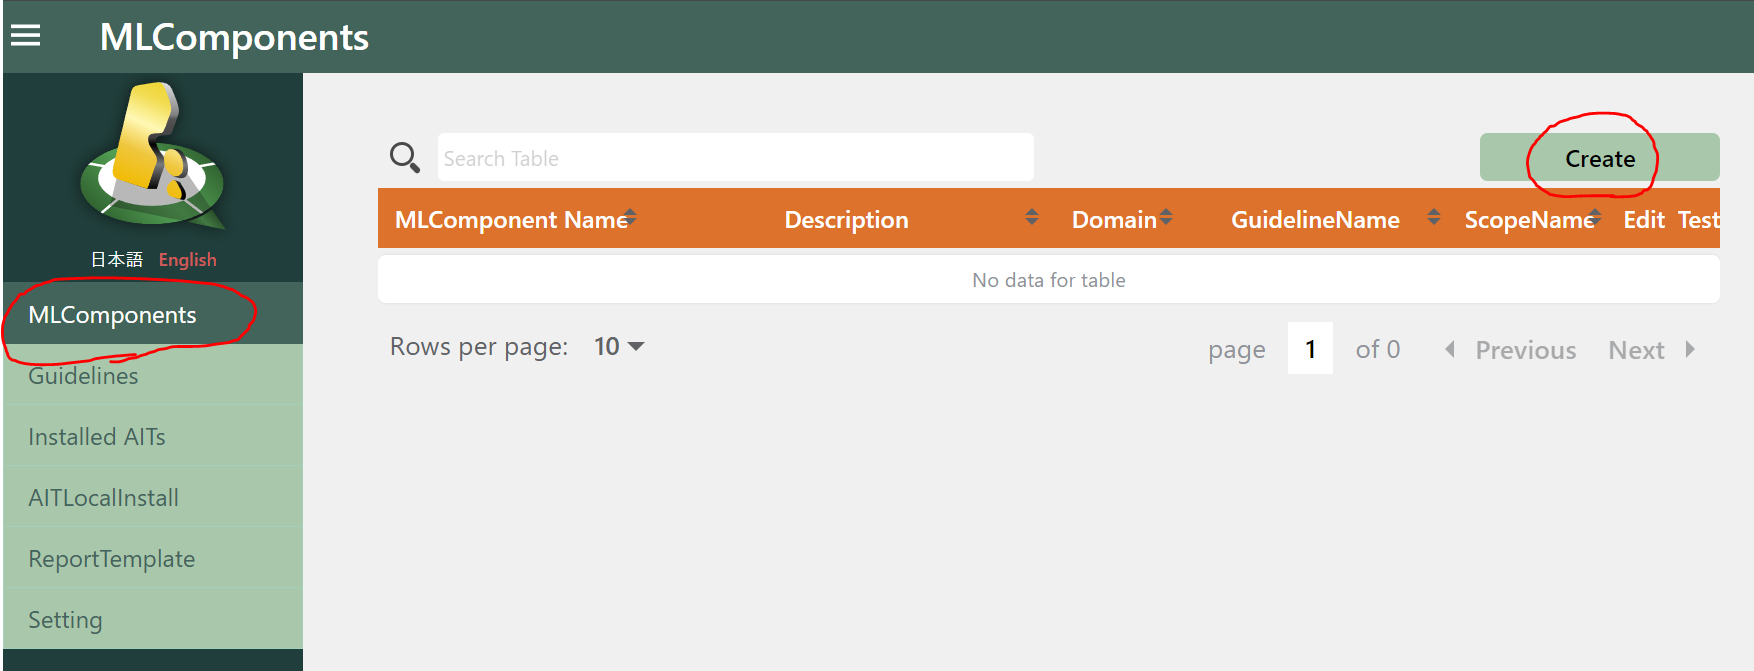

- 後から参照しやすくするため、機械学習コンポーネントの名称と説明を設定する必要があります。
  - ここでは以下の画像のように設定しておきましょう。自由記述ですがタスクのドメインはテキスト生成ですので、テキスト生成としておきます。

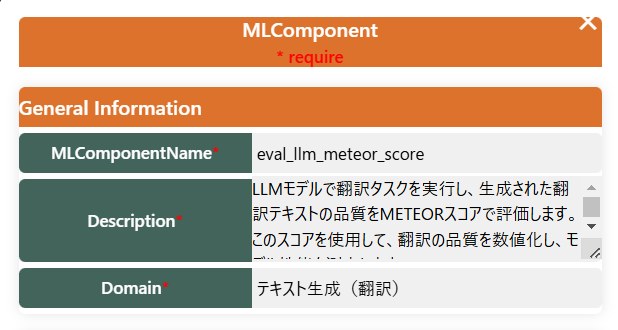

- Qunomonを用いた品質管理では、どのガイドラインや標準に従って品質評価を行っているのかを管理することで、評価観点の抜け・漏れや、ガイドライン・標準に対する適合性を管理します。
  - ここでは最初から設定されている産総研の「機械学習品質マネジメントガイドライン　第三版」を設定しておきましょう。
- ガイドラインがドメインやタスク種別ごとに異なる品質特性の管理を要求している場合があります。このとき、「スコープ」は今回対象とする機械学習コンポーネントについて管理すべき品質特性をまとめたものです。
  - 機械学習品質マネジメントガイドラインでは、取り扱いスコープがひとつしかありませんので、これを選択しておいてください。
  - ただし、生成系モデルや強化学習などについては今回選択したスコープ（ガイドラインの対象スコープ）の対象となっていません。あらかじめガイドラインを読んだうえで、開発中の機械学習コンポーネントがガイドラインの管理対象となるスコープに含まれるかどうかは品質評価者自身で判断するようにしてください。

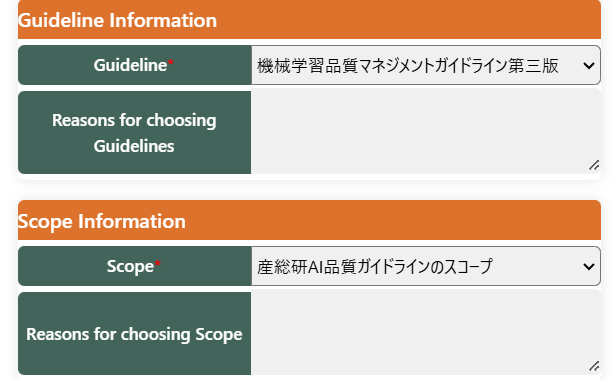

- 次の項目に進む前に、登録した機械学習コンポーネントの詳細画面に遷移しておきましょう。
  - 機械学習コンポーネントの詳細画面では、機械学習コンポーネントを構成する個々の資産（モデル、データセット）と、個々の資産を複数のインストール済AITで評価するテスト仕様を管理します。
  - それぞれ、個別の資産はInventory（インベントリ）、テスト仕様はTest Description（テスト・デスクリプション）という枠組みで管理が行われます。

### 3.4.テスト仕様（Test Description）の登録
- 次に、テスト仕様の登録を行います。
  - まずMLComponent画面に3.3で作成した構造物欠陥判別コンポ―ネントが登録されていることを確認してください。
  - 確認出来たら、右端の「テスト」列のボタンを押下し、テスト仕様登録画面へ遷移します。
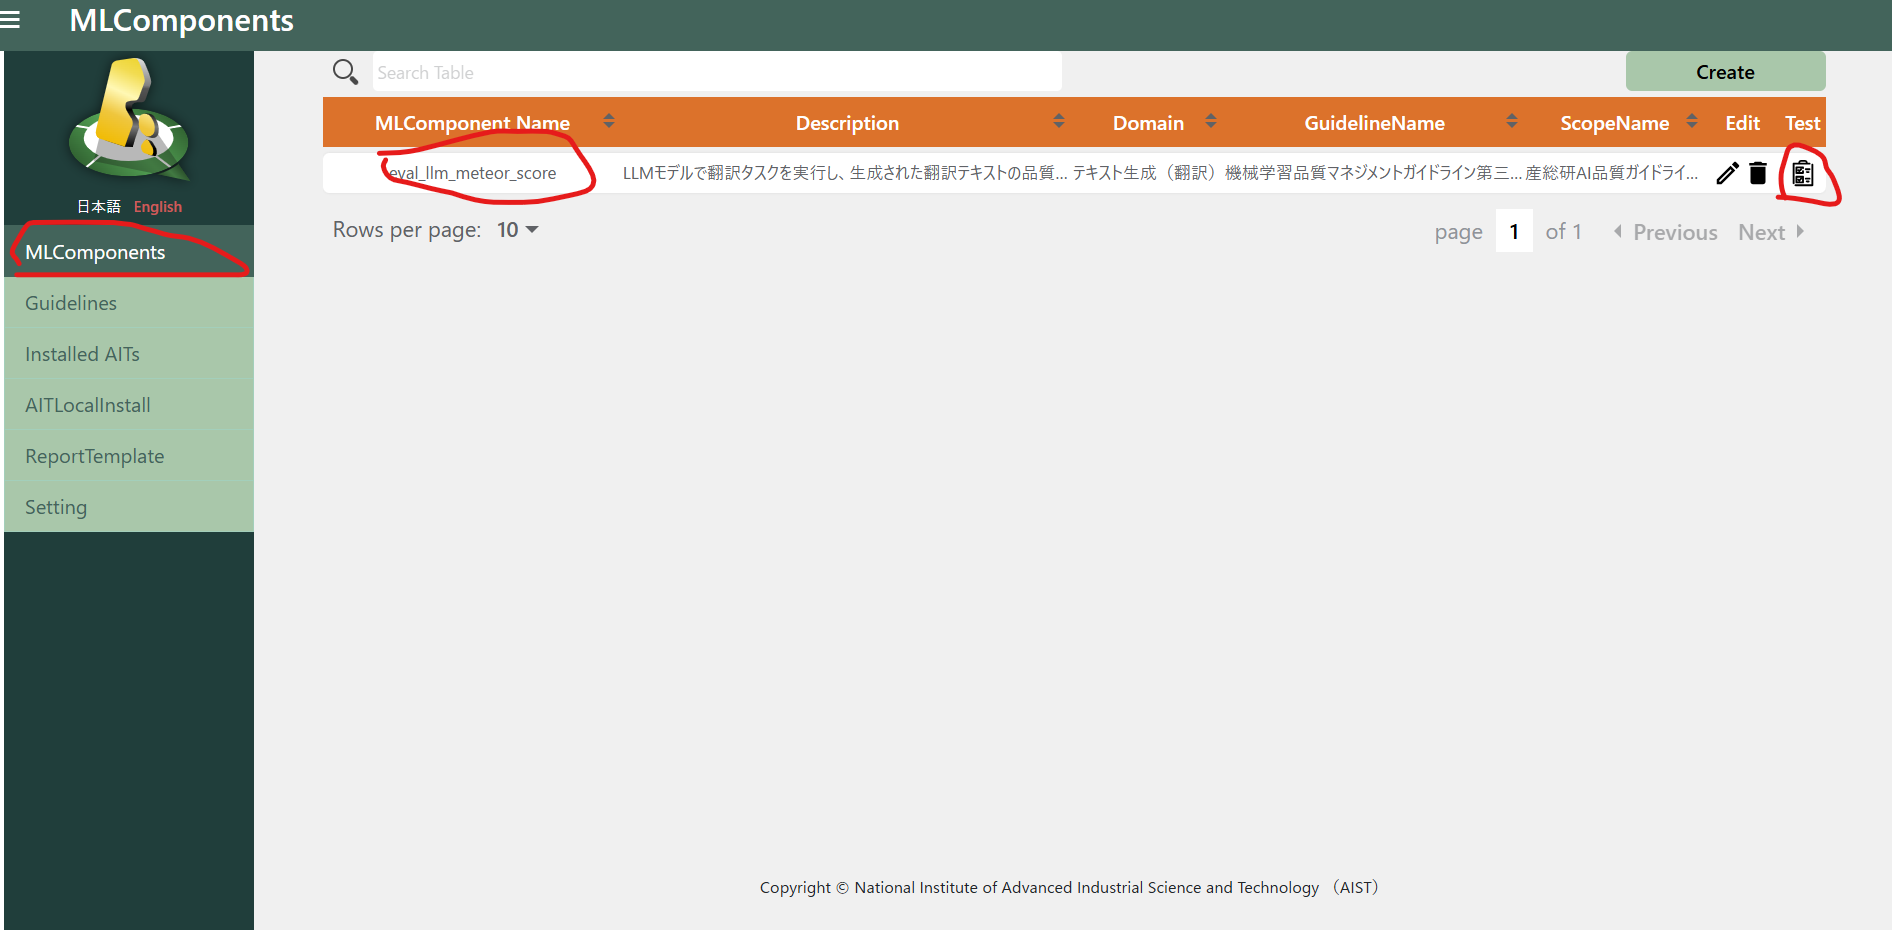

#### 3.4.1.テスト対象資産のインベントリへの登録
- テスト仕様を登録する前に、テスト対象資産（テストしたいデータセットやモデル）を、MLComponentのインベントリ領域に格納する必要があります。テスト時には、ここに登録されたテスト対象資産がAITから参照され、検査されます。
- 以下はテスト仕様登録画面からテスト対象資産の登録を行う手順になります。

【手順1】eval_llm_meteor_score MLComponent のテスト仕様登録画面から Inventories を押下

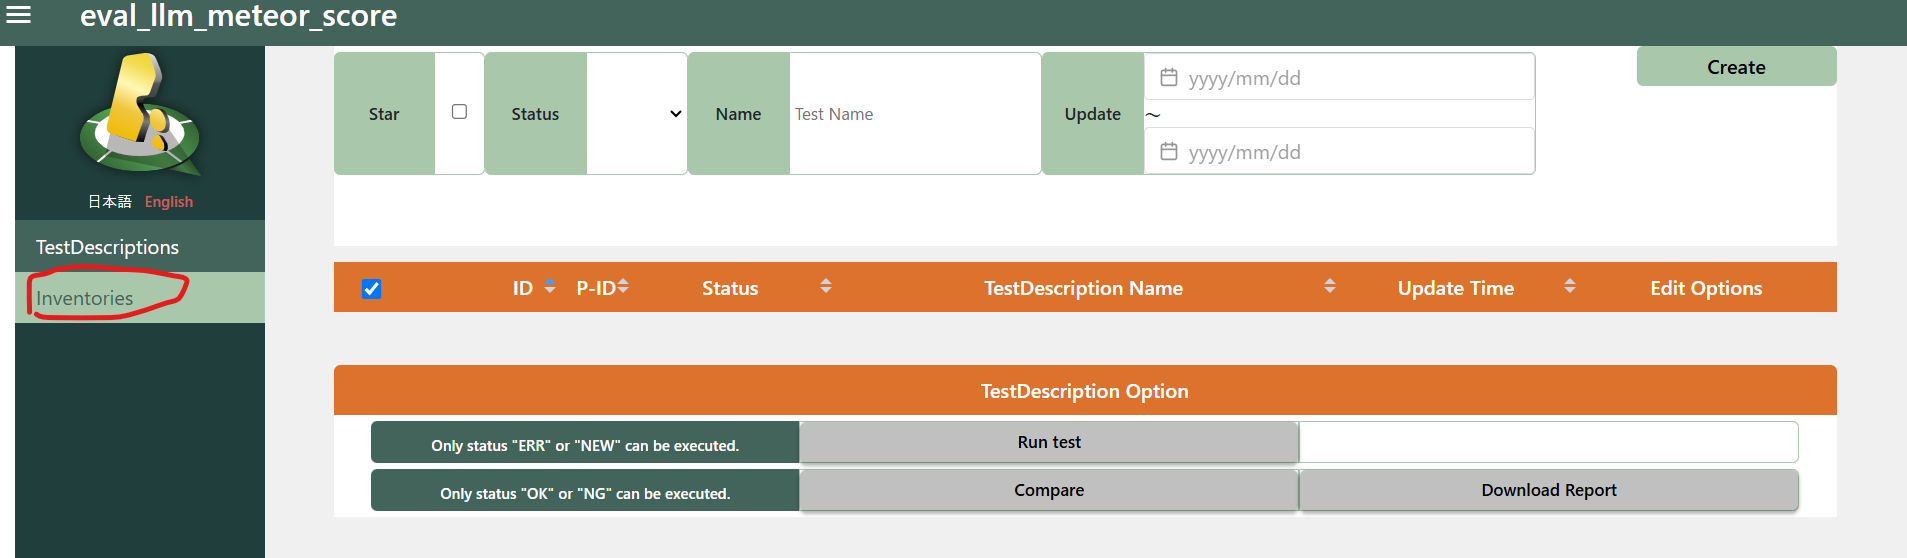

【手順2】eval_llm_meteor_score MLComponent のインベントリ一覧画面から Create を押下

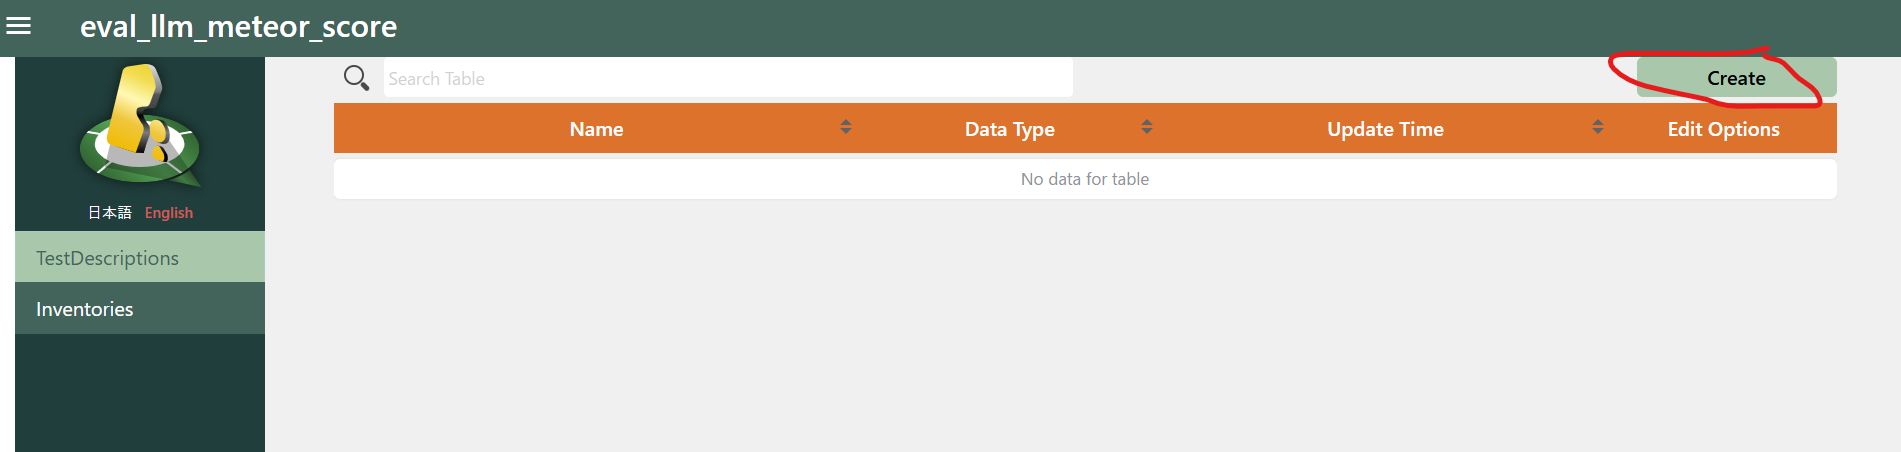

【手順3】まずはモデルを登録します。モデル ([こちら](https://huggingface.co/google-t5/t5-small)からダウンロード) をPC上に配置し、Path欄にはそのファイルパスを入力してください。
Nameには他のアセットと判別しやすい名前をつけてください。DataTypeは登録する資産に適合するものを選んでください。拡張子よりALLを選択します。
** 今回のチュートリアルと同等のモデルを訓練し、保存する方法については後述します。第二部 5章を参照してください！ **

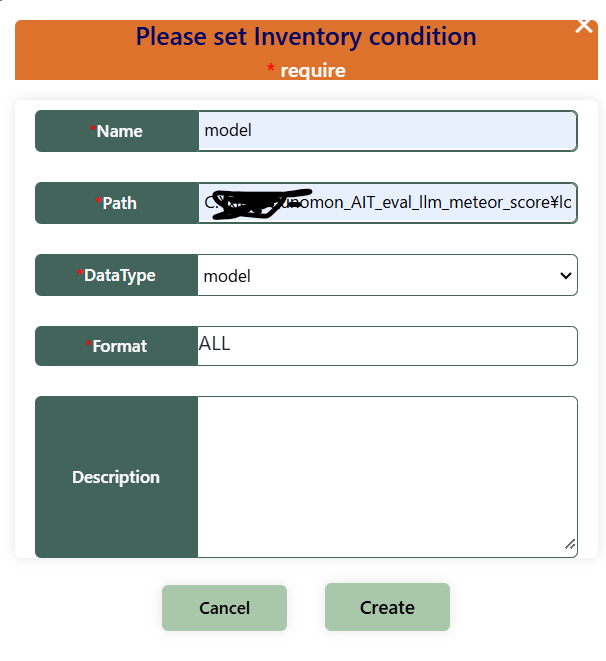

【手順4】同じくデータセットを登録します。4.2.2.節で作成したJSON形式のデータセットのファイルパスを指定してください。
** データセットについては第二部 4章を参照してください **

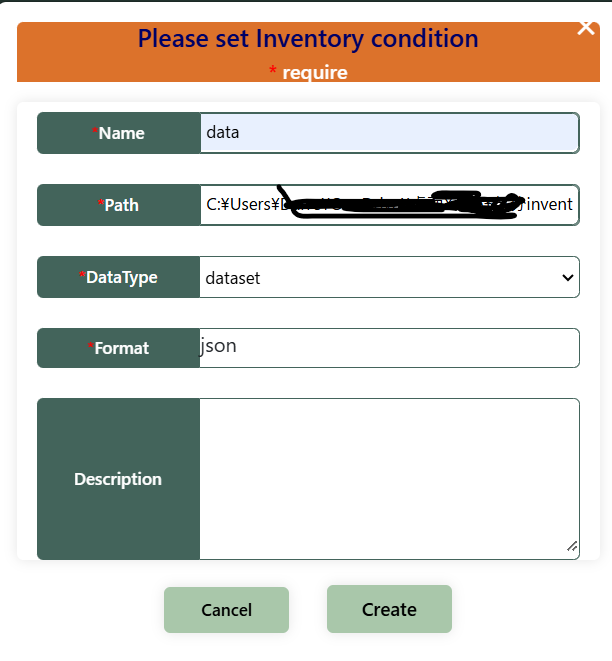

【手順5】登録が完了したら、テスト仕様登録画面に戻ってください。

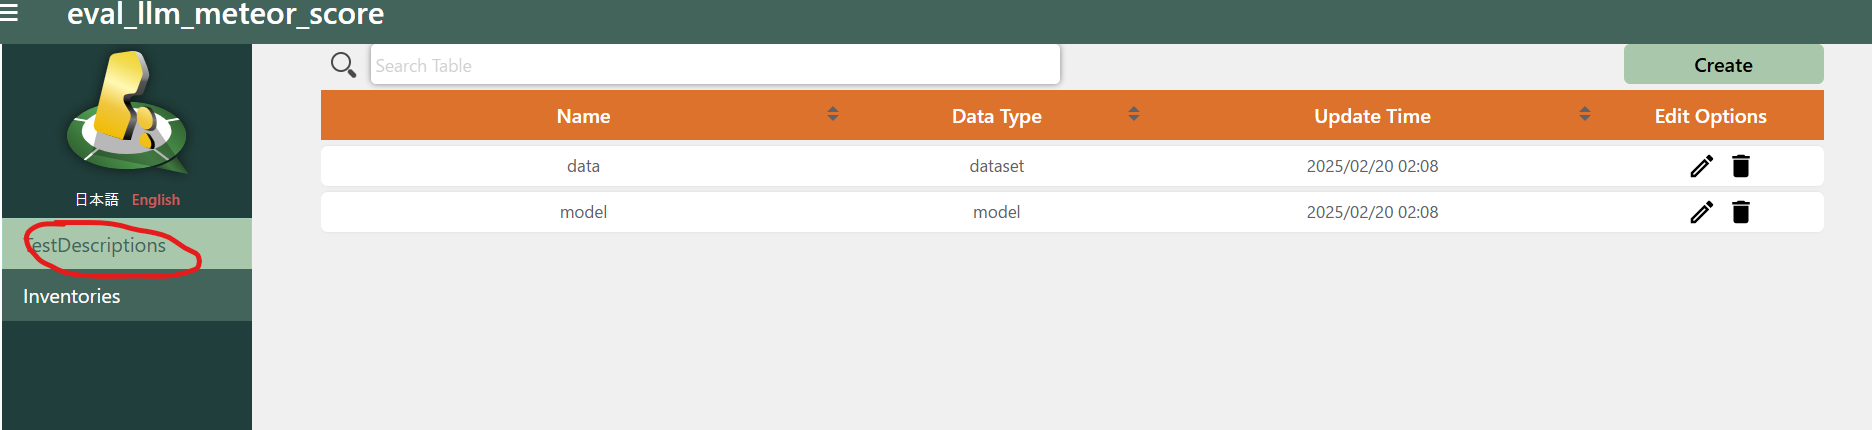

#### 3.4.2.テスト仕様の登録
- テスト仕様の登録を行います。

【手順1】テスト仕様登録画面へ遷移します。

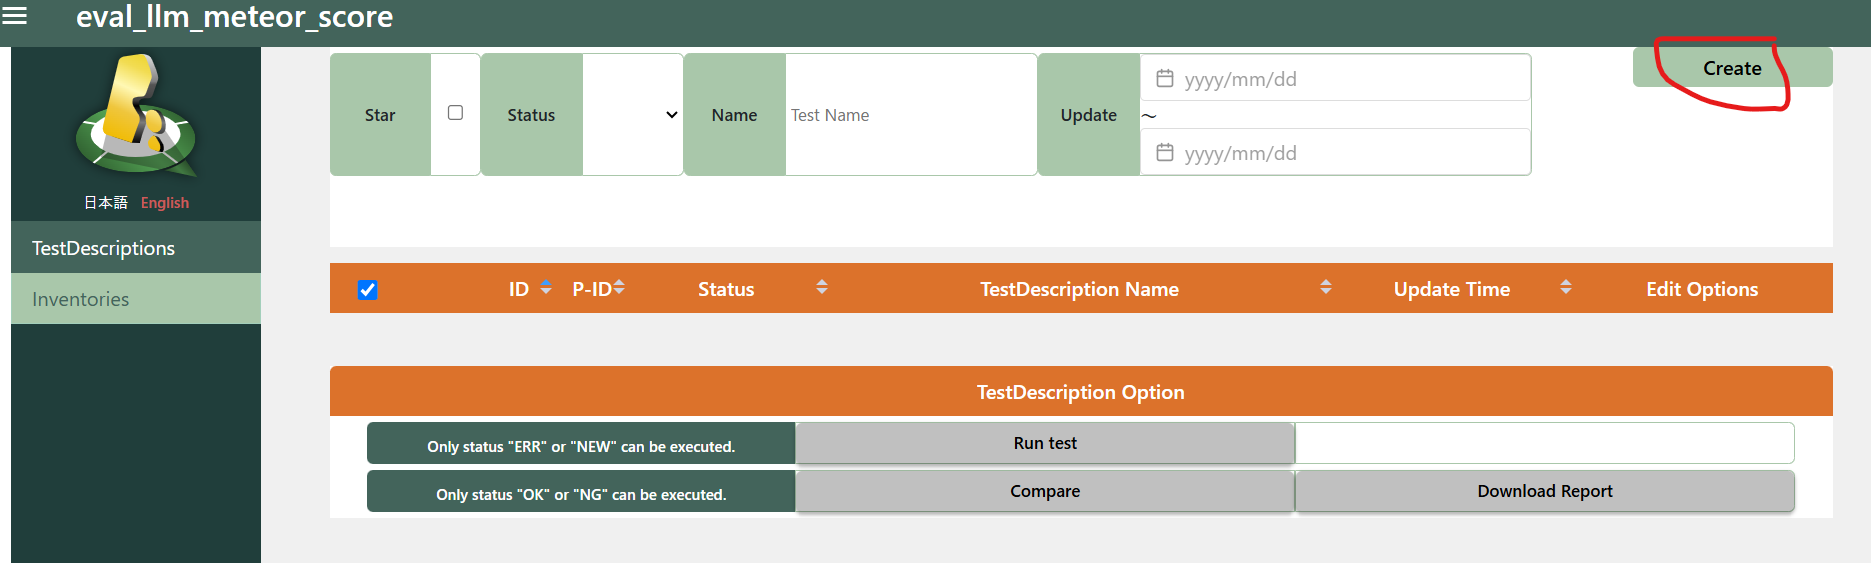

【手順2】下図の要領で必要事項を入力します。

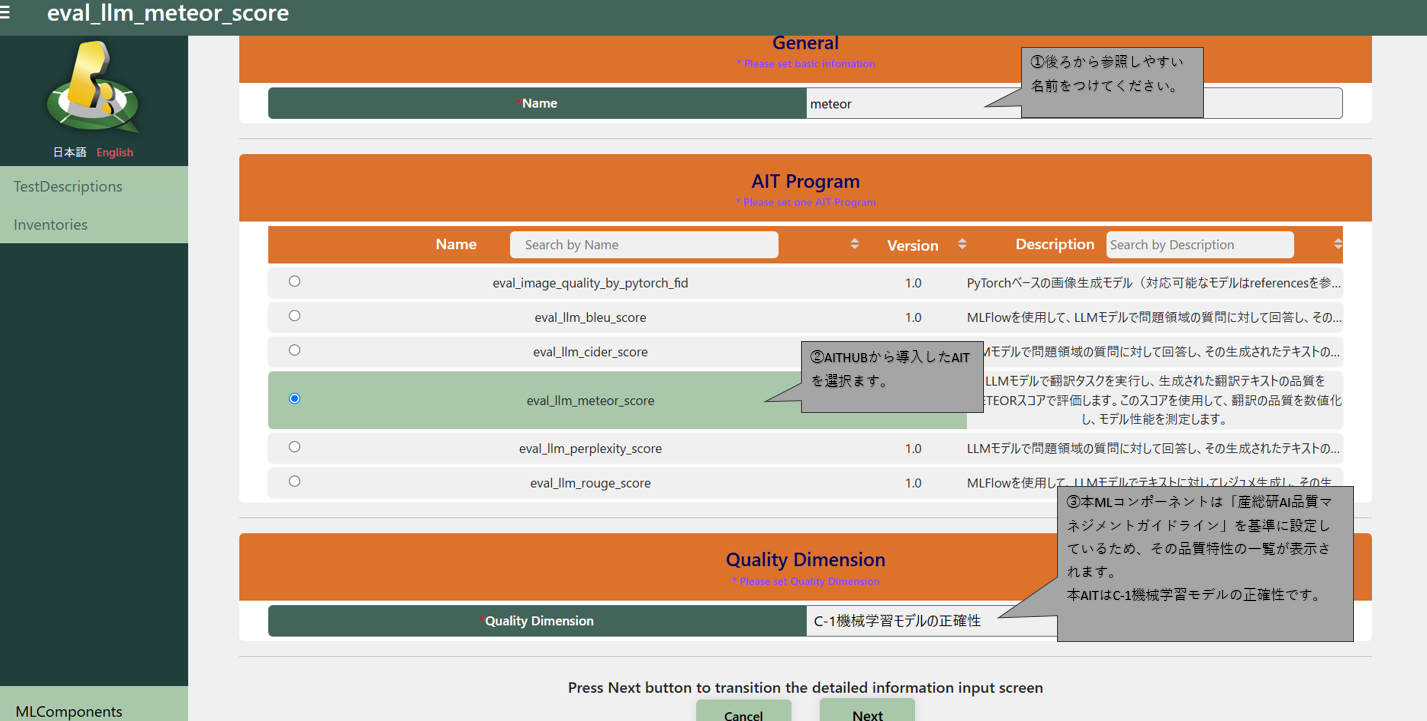

【手順3】テスト受け入れ基準を設定します。今回はテストですので、精度0.3以上を基準としておきましょう。

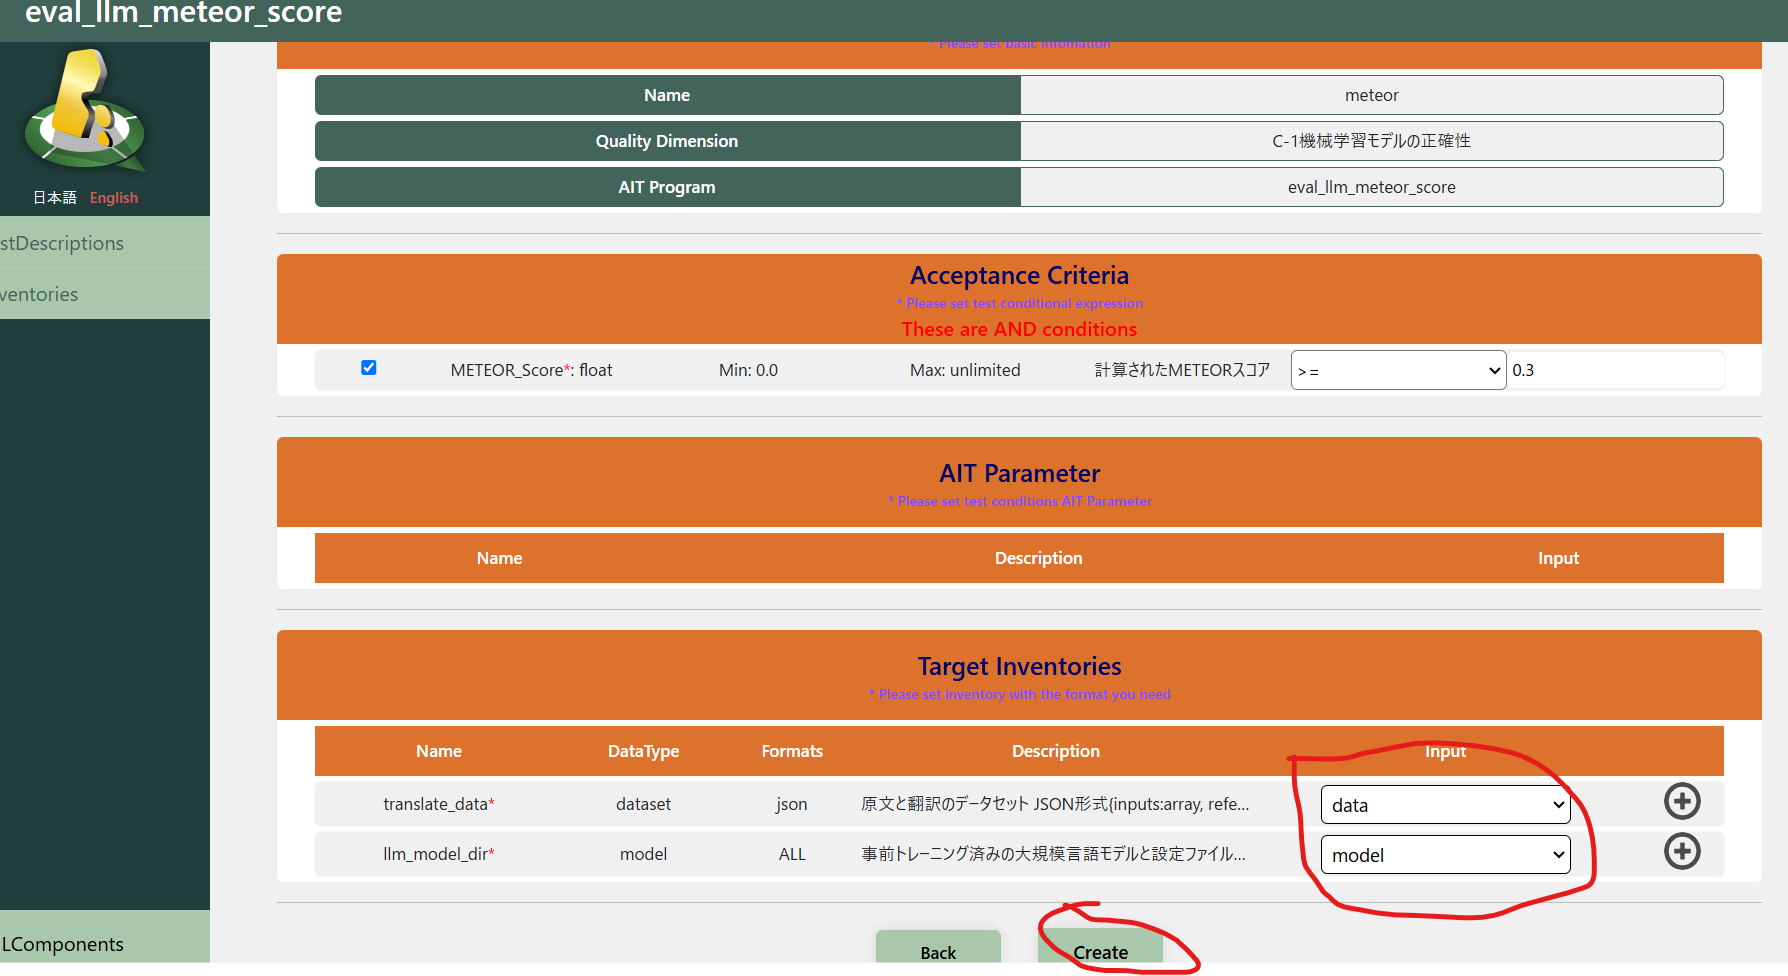

また、テストで用いるデータセット・モデルを登録したインベントリと紐づけてください。
準備が完了したら、Createを押下してください。

### 3.5.評価の実行と結果確認
#### 3.5.1.実行
MLコンポ―ネントのテスト仕様画面に遷移し、3.4節で設定したテスト仕様にチェックを入れて、`Run Test`を押下してください。

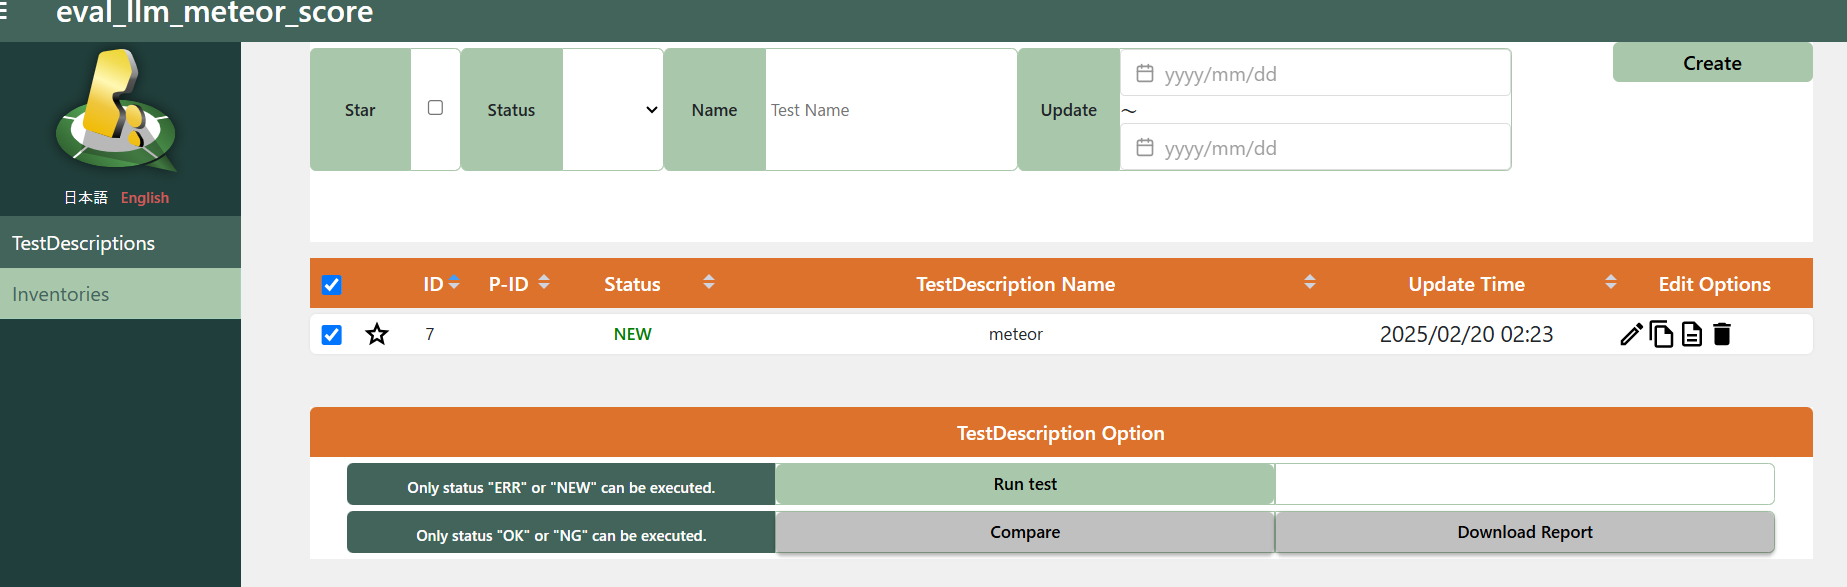

テストはリアルタイムに実行され、状況も画面上に表示されます。
図示するように、Status:DONEと表示されれば評価が完了したことを表します。
次行の評価結果のうち、「OK」はすべての受け入れ基準を満たしたことを表し、「ERR」は受け入れ基準を満たさない項目があったことを表します。
※「ERR」「NA」は実行中になんらかの問題があったことを表します。エラー発生時にはログも閲覧できます。

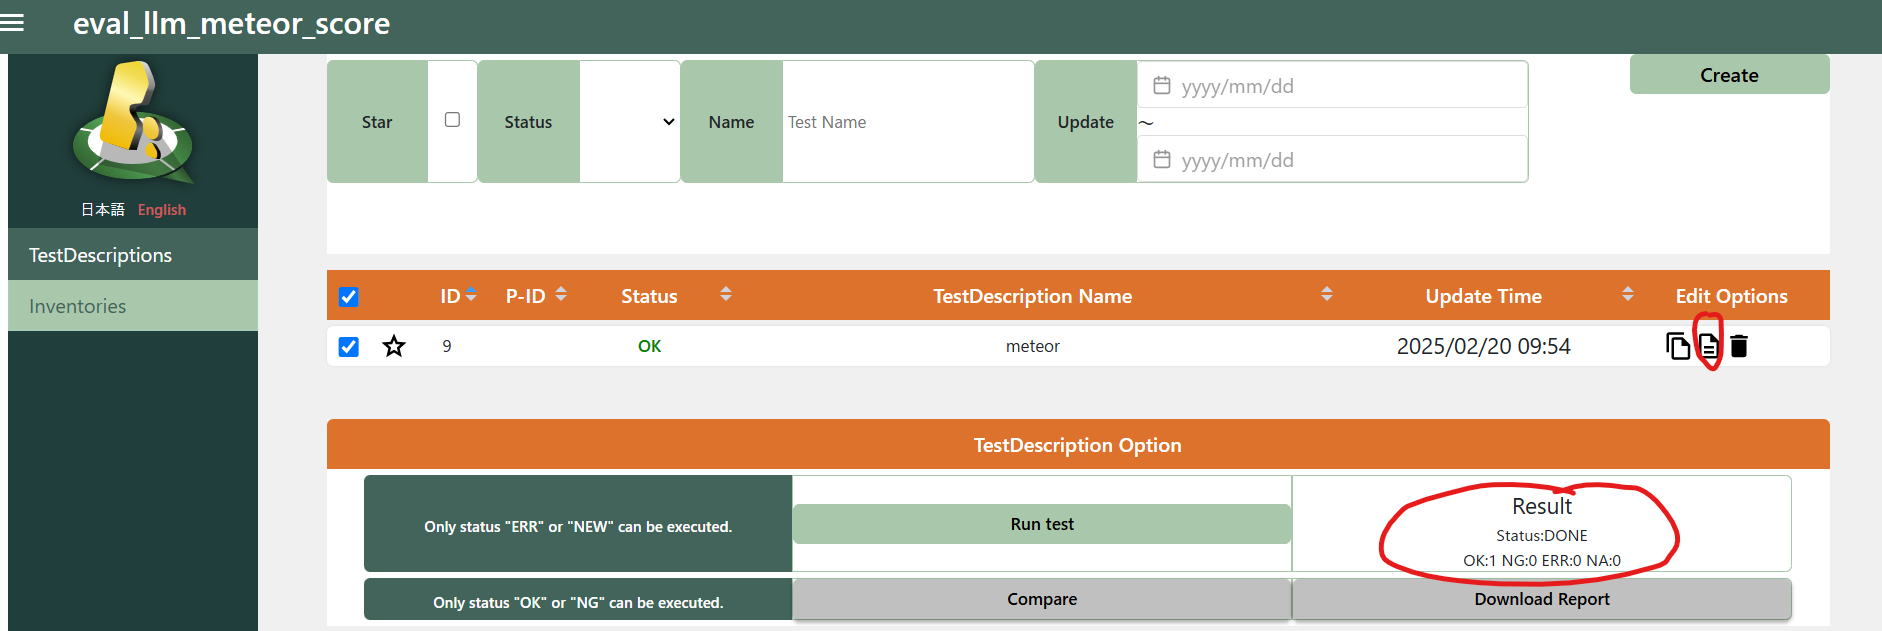

#### 3.5.2.モデル評価結果の確認
実行したテスト仕様の右列にある"detail"ボタン（資料のアイコン）をクリックすると結果の詳細を閲覧できます。
この画面であなたのテスト結果に対する見解を入力してください。
テスト結果が「OK」であることは、設定した受け入れ基準することを表しますが、最終的には人間が評価の実行結果を確認して判断する仕組みになっています。
以降はテスト結果画面の説明になります。

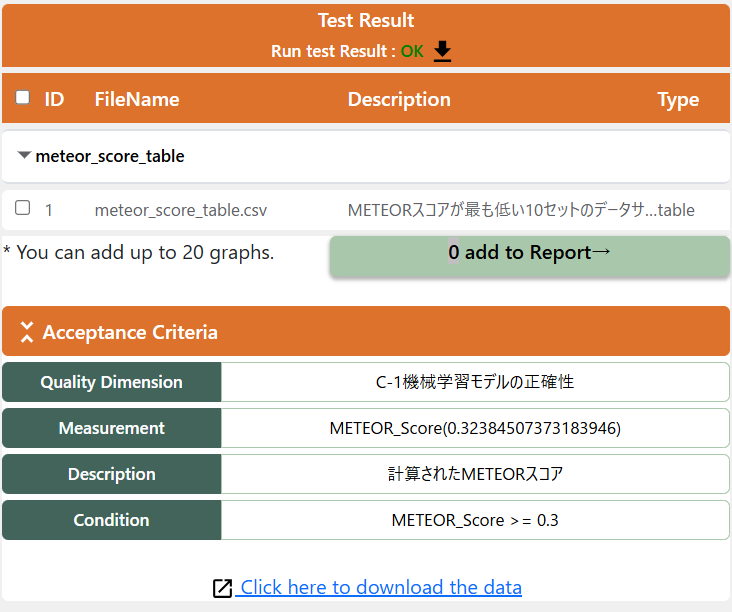

画面右が見解記入領域です。
上部は、AITが出力した結果のうちどれを最終的な結果ドキュメントに含めるかの設定ができます。
今回の結果に対して見解を記入し、Saveボタンを押下しましょう。

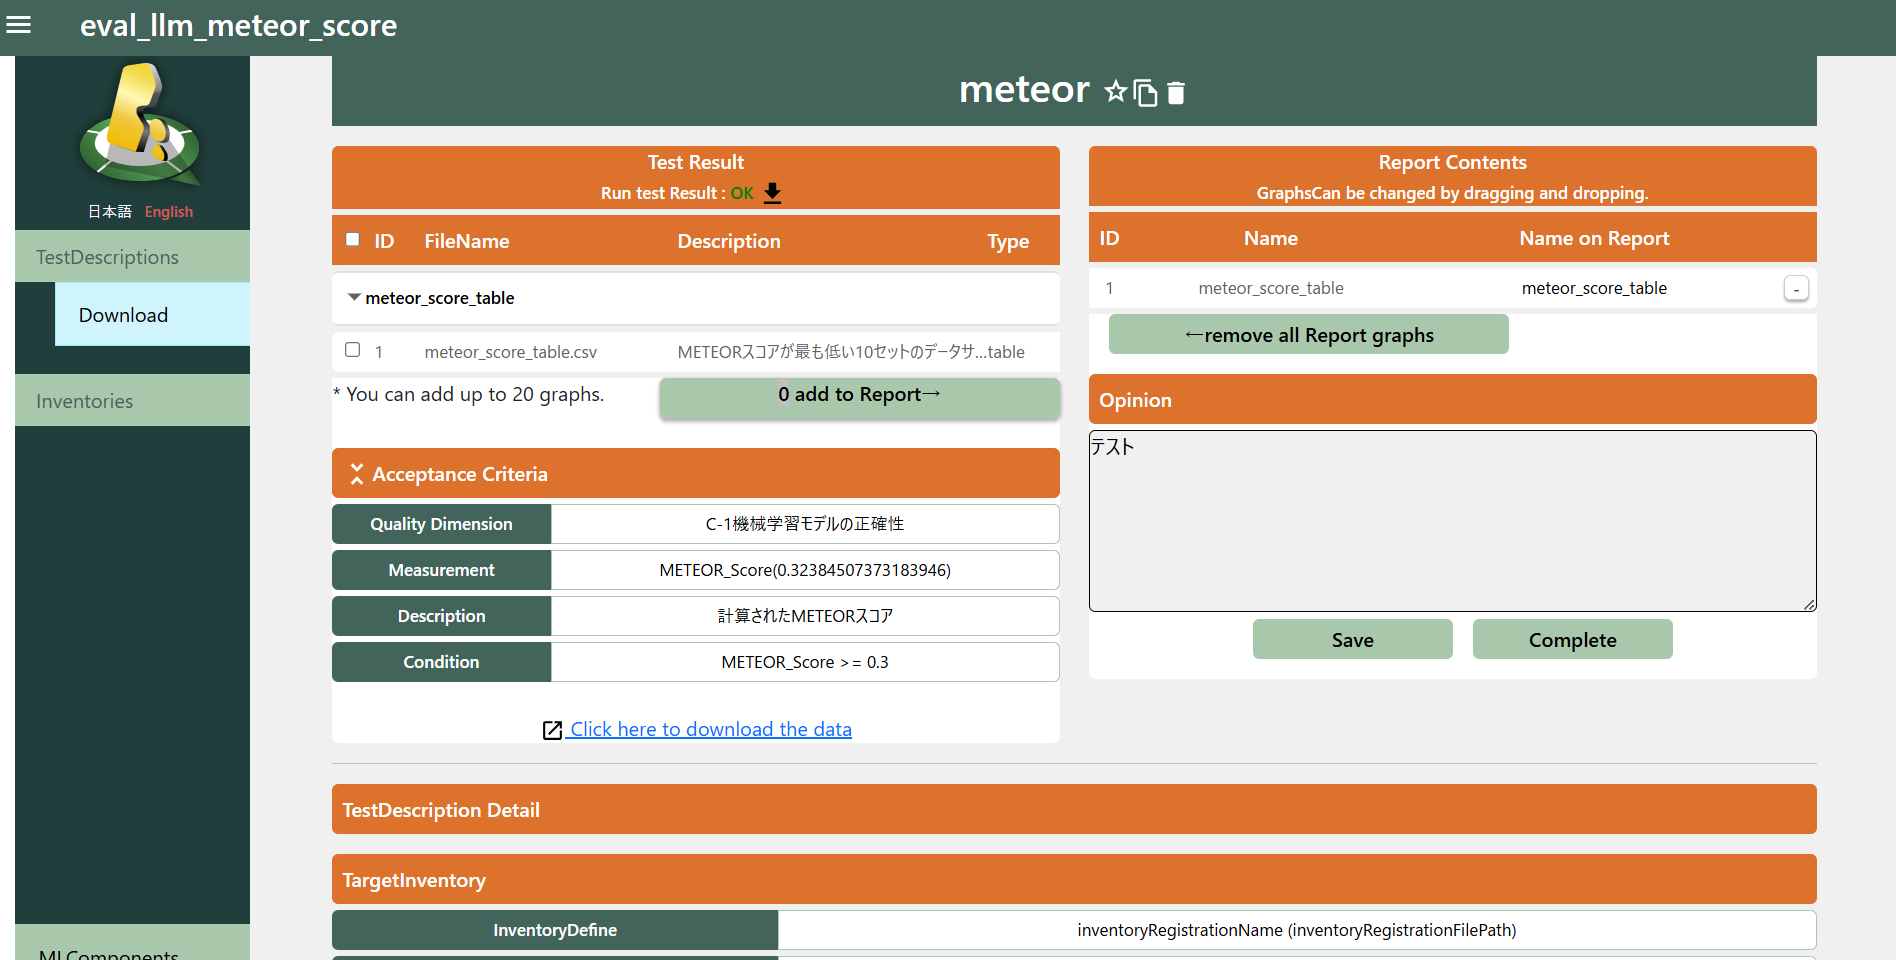

### 3.6.品質レポートの作成
テストが実行できましたので、実行したすべてのテストの結果をまとめた品質レポートを作成します。
前の画面に戻り、Download Reportボタンを押下してください。

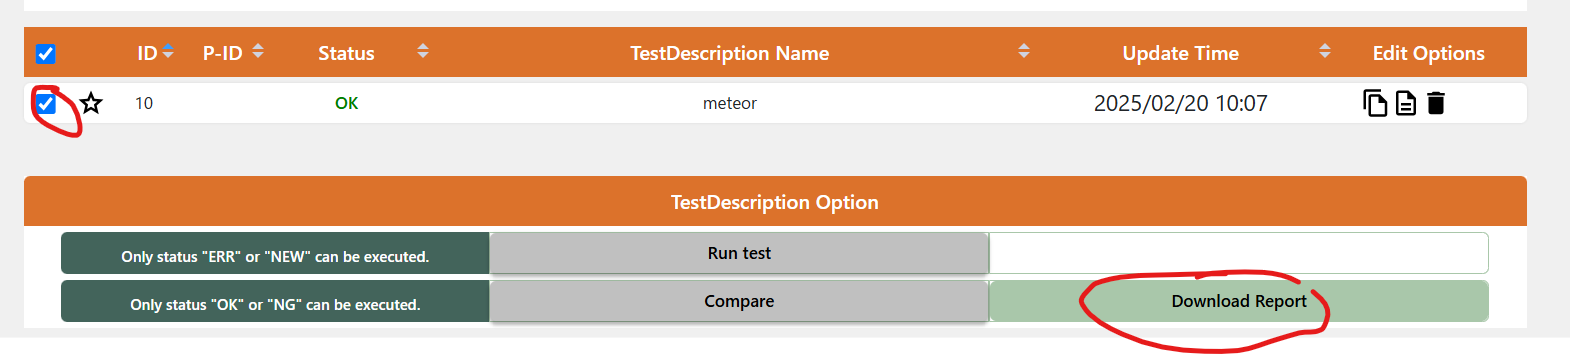

レポート生成時に、ガイドライン・標準にあわせて体系的に結果出力を行いますので、テンプレートを選んでください。
ここでは産総研AI品質マネジメントガイドライン（AIQMガイドライン）のテンプレートを選びます。

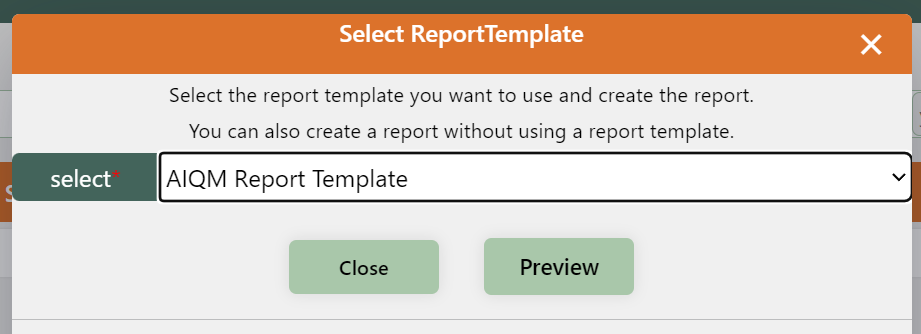

プレビューから生成予定のレポートを閲覧できます。

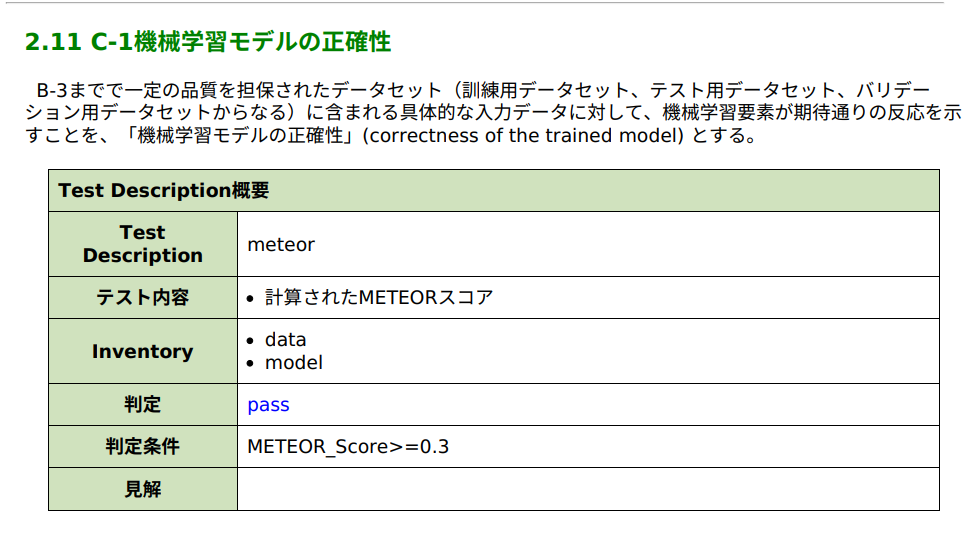
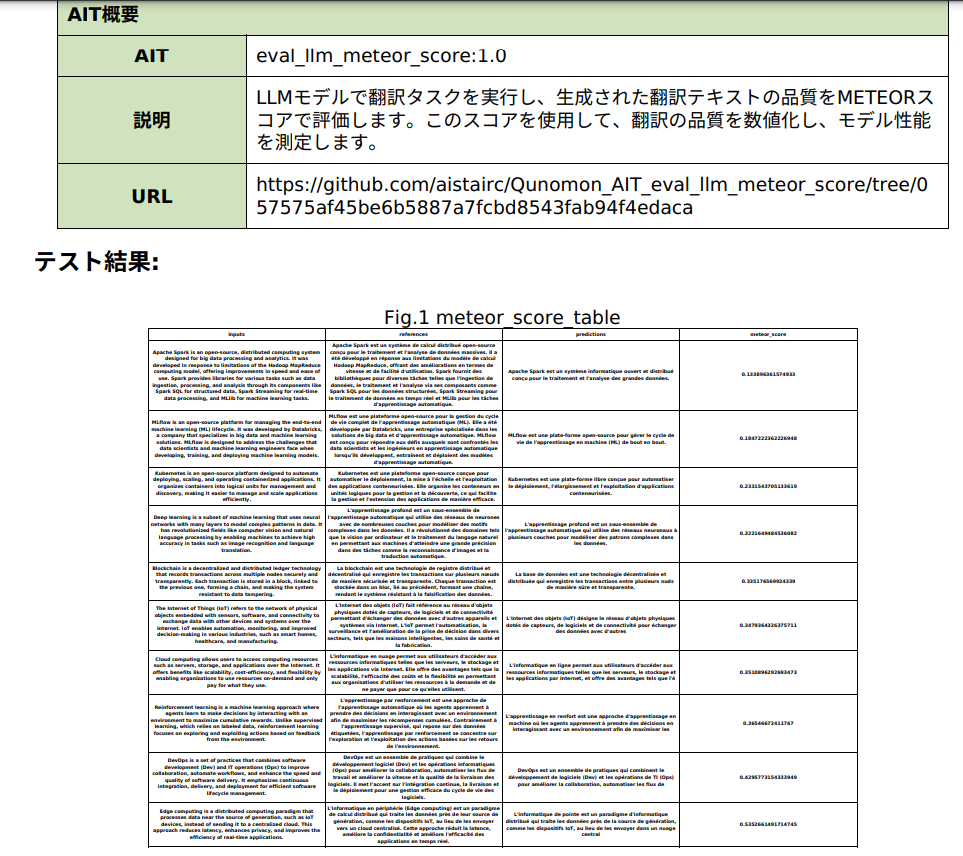

最後に画面左側よりレポートを生成しましょう。PDF形式でダウンロードされ、後から参照できるようになります。

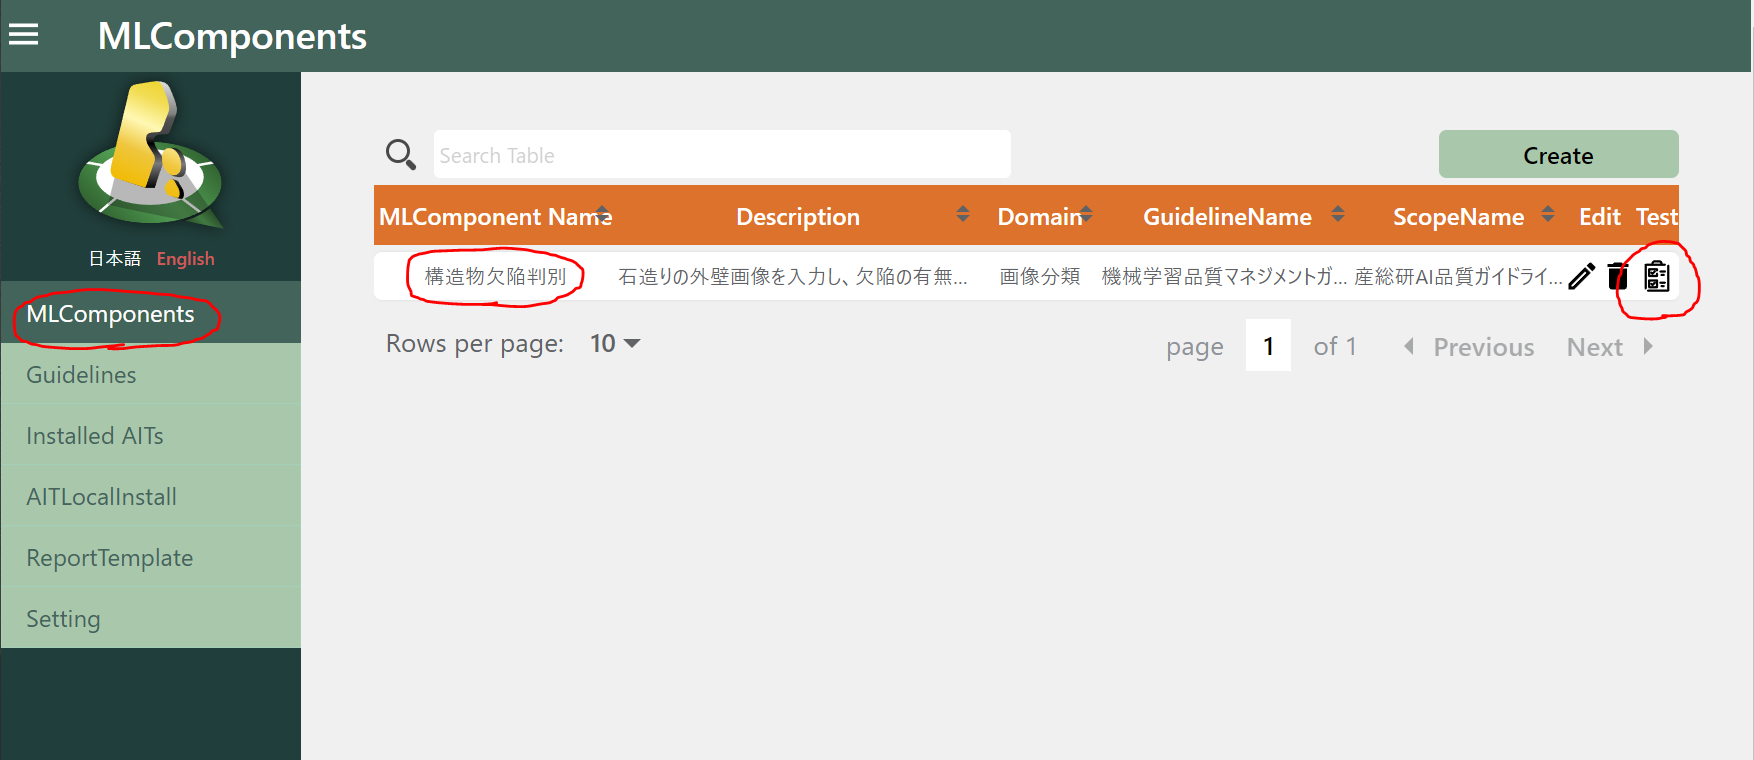

---

# 第二部 機械学習コンポーネントの準備方法


----
## 4.データセット準備
### 4.1.データセットの作成
- 原文と翻訳のデータセット、JSON形式{inputs:array, references:array}
- 原文：input
- 参照訳文：references
- 例：{inputs: 
       [MLflow is an open-source platform for managing the end-to-end machine learning (ML) lifecycle.], 
     references:
       [MLflow est une plateforme open-source pour la gestion du cycle de vie complet.]
    }

### 4.2.データセットの配置
下記のディレクトリ構造となるようにresources直下に配置してください。

- best_practice/
    - resources/
      - dateset/
        - translate_data.json

## 5. モデルの準備
### 5.1 モデルのダウンロード

- HuggingFaceのモデル（T5-small）[こちら](https://huggingface.co/google-t5/t5-small)からダウンロード

必要なファイルは
- config.json
- model.safetensors
- generation_config.json
- special_tokens_map.json
- tokenizer_config.json
- tokenizer.json

ダウンロードしたモデルは5.3のコードの検証結果は下記の通り
- 赤枠の部分は各訳文の品質をMETEORスコアの評価結果と平均スコア。
- 区間：0.01~0.05

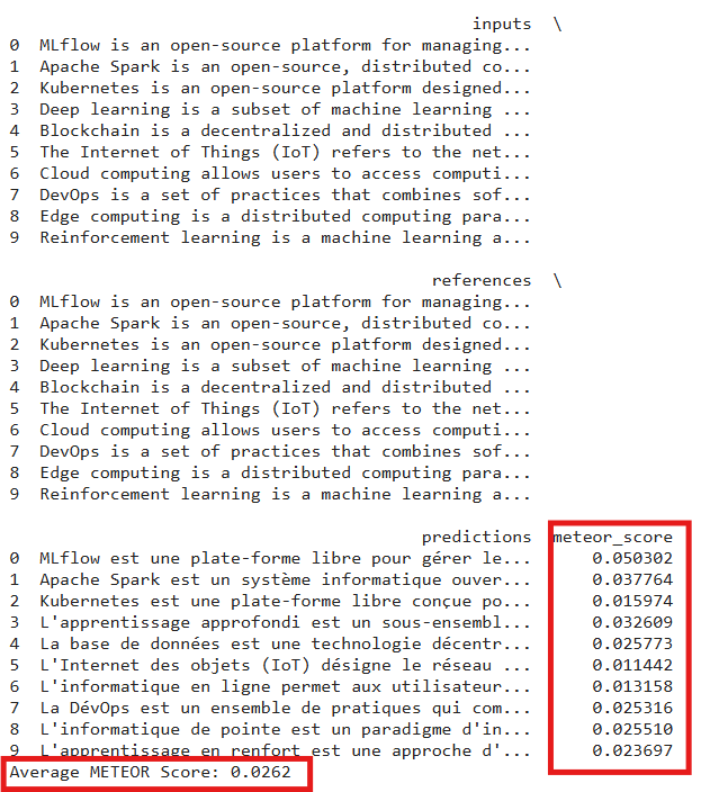


### 5.2 モデルのファインチューニング
目的
- METEOR スコアの精度を向上させる
手段（ファインチューニング）
- 選択したモデルを、用意したデータセットで再学習する。
- 学習率やバッチサイズなどのハイパーパラメータを調整し、最適な設定を見つける。

下記ソースによってモデルの最適な設定を見つけって、モデルを更新する。

In [ ]:
import os
import json
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer
from datasets import Dataset

# fine-tunning後、モデル保存ディレクトリ
FINETUNED_MODEL_DIR = "llm_model_dir_finetuned"

# 🔹 1. データロード
def load_translation_data():
    with open(ait_input.get_inventory_path('translate_data'), "r") as file:
        json_data = json.load(file)
    df = pd.DataFrame(json_data)

    dataset = Dataset.from_pandas(df)
    return dataset

# 🔹 2. Data Preprocessing
def preprocess_function(examples):
    inputs = [f"translate English to French: {text}" for text in examples["inputs"]]
    targets = [text for text in examples["references"]]

    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# 🔹 3. Fine-Tuning
def fine_tune_model():
    global tokenizer
    tokenizer_path = ait_input.get_inventory_path('llm_model_dir')
    model_path = ait_input.get_inventory_path('llm_model_dir')

    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    dataset = load_translation_data()
    tokenized_dataset = dataset.map(preprocess_function, batched=True)
    # トレーニングパラメータ
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        save_total_limit=2,
        logging_dir="./logs",
        logging_steps=100,
        push_to_hub=False,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset,
        eval_dataset=tokenized_dataset,
        tokenizer=tokenizer
    )

    trainer.train()

    # モデル保存
    model.save_pretrained(FINETUNED_MODEL_DIR)
    tokenizer.save_pretrained(FINETUNED_MODEL_DIR)

    print(f"Fine-Tuned 保存先: {FINETUNED_MODEL_DIR}")

# 🔹Fine-Tuning実行
def main() -> None:
    fine_tune_model()


### 5.3 モデルの検証
以下のコードでモデルを読み込み、テストデータでファインチューニングの結果を検証してみましょう。


In [ ]:
@log(logger)
def calculate_meteor(row):
    tokenized_generated = row['predictions'].split()
    tokenized_reference = row['references'].split()
    return meteor_score([tokenized_reference], tokenized_generated)

In [ ]:
@log(logger)
def generate_translation(text, tokenizer, model):
    translation_input = f"translate English to French: {text}"
    inputs = tokenizer(translation_input, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model.generate(input_ids=inputs["input_ids"], max_length=50, num_beams=4, early_stopping=True) 
    translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translation

In [ ]:
@log(logger)
@measures(ait_output, 'METEOR_Score')
def mean_meteor(mean_meteor):
    return mean_meteor

In [ ]:
@log(logger)
@downloads(ait_output, path_helper, 'meteor_table', 'meteor_table.csv')
def eval_result(eval_table, file_path: str=None) -> str:
    eval_table.to_csv(file_path, index=False)

In [ ]:
@log(logger)
@resources(ait_output, path_helper, 'meteor_score_table', 'meteor_score_table.csv')
def meteor_score_table(data: pd.DataFrame, file_path: str=None, num_items: int = 10) -> str:
    """
    スコアの悪いものから順でCSVとして保存する関数。

    :param data: 評価結果のデータフレーム
    :param file_path: 出力先のCSVファイルパス
    :return: 保存したCSVファイルのパス
    """
    # スコアの低い順にソートし、上位10件を取得
    sorted_data = data.sort_values(by="meteor_score", ascending=True).head(num_items)

    # 指定したパスにCSVを保存
    sorted_data.to_csv(file_path, index=False, encoding="utf-8")

    return file_path

In [ ]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [ ]:
@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    # 並列処理の警告を抑制
    os.environ["TOKENIZERS_PARALLELISM"] = "false"
    #インプットデータロードする
    with open(ait_input.get_inventory_path('translate_data'), "r") as file:
        json_data = json.load(file)
    eval_data = pd.DataFrame(json_data)
    
    # ローカルに保存されたLLMモデルを読み込む
    tokenizer_path = ait_input.get_inventory_path('llm_model_dir')
    model_path = ait_input.get_inventory_path('llm_model_dir')
    # Transformers を使用してモデルとトークナイザをロード
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    # モデルでインプットデータ翻訳する
    eval_data['predictions'] = eval_data['inputs'].apply(lambda x: generate_translation(x, tokenizer, model))
    # meteor_score計算する
    eval_data['meteor_score'] = eval_data.apply(calculate_meteor, axis=1)
    # 評価結果を表示
    print(eval_data[['inputs', 'references', 'predictions', 'meteor_score']])
    average_score = eval_data['meteor_score'].mean()
    mean_meteor(average_score)
    eval_result(eval_data)
    # スコアで昇順にソートし、上位10行を取得
    meteor_score_table(eval_data, num_items=10)
    print(f"Average METEOR Score: {average_score:.4f}")

    # AIT実行ログ出力
    move_log()

実行結果は下記の通り。METEORスコアの精度は10倍ぐらい上がる。

- 赤枠の部分は各訳文の品質をMETEORスコアの評価結果と平均スコア。
- 区間：0.13~0.53

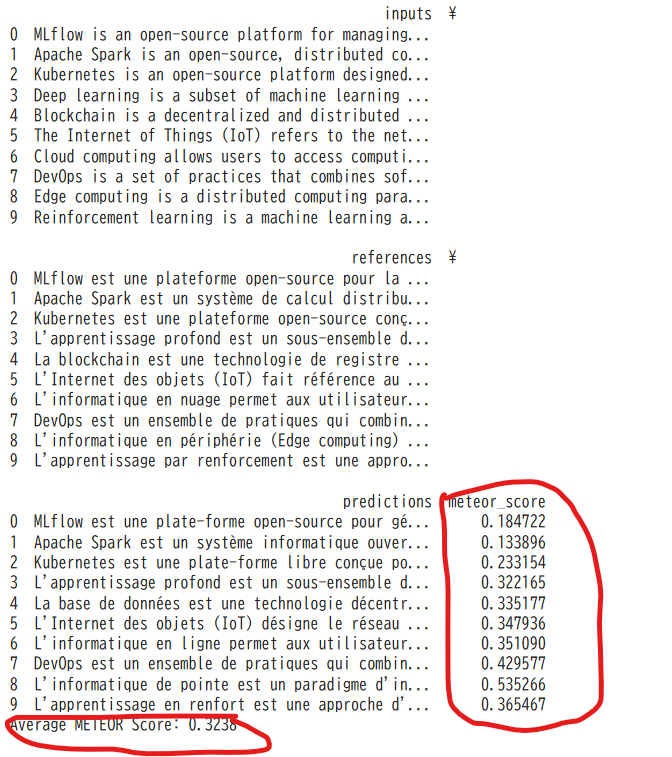